In [ ]:
!pip install shap
!pip install treeinterpreter
!pip install six

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


### 📌 Resumen: Feature Selection

La **selección de características** (*feature selection*), también conocida como selección de atributos o variables relevantes, es el proceso mediante el cual se elige un subconjunto de variables significativas (predictores) a partir del conjunto original, con el objetivo de construir modelos más eficientes y efectivos.

Este proceso es ampliamente utilizado por las siguientes razones:

- ✅ **Simplificación del modelo:** reduce la complejidad del modelo, lo que facilita su interpretación por parte de usuarios o investigadores.
- ⚡ **Reducción del tiempo de entrenamiento:** al disminuir el número de variables, los algoritmos requieren menos recursos computacionales.
- 🚫 **Mitigación de la maldición de la dimensionalidad:** al aumentar el número de características, se incrementa exponencialmente la cantidad de datos necesarios para lograr resultados estadísticamente significativos.
- 📈 **Mejor generalización del modelo:** al reducir el número de variables irrelevantes o redundantes, se disminuye el riesgo de *overfitting*, lo que mejora la capacidad del modelo para generalizar a nuevos datos (reducción de la varianza).




In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/'

filename = 'pima-indians-diabetes.data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(f"{path}{filename}")

## 📊 Criterios para la Selección de Características

La selección adecuada de características es fundamental para construir modelos eficientes, interpretables y generalizables. A continuación se enumeran los principales criterios que motivan este proceso:

---

### 🔁 1. Eliminar variables con alta correlación

- Las características altamente correlacionadas entre sí pueden aportar **redundancia**.
- Mantener solo una de ellas **reduce la complejidad sin pérdida significativa de información**.

---

### 📏 2. Reducir la sobre-dimensionalidad

- Un número excesivo de variables aumenta el **costo computacional** y puede generar **_overfitting_**.
- Esto se conoce como la **maldición de la dimensionalidad**, donde se requieren muchas más observaciones para que el modelo tenga significancia estadística.

---

### ⚡ 3. Mejorar los tiempos de entrenamiento

- Menos variables implican **menos cálculos**, lo que reduce significativamente el tiempo necesario para entrenar los modelos.

---

### 👁️ 4. Aumentar la interpretabilidad del modelo

- Modelos con pocas características clave son **más fáciles de entender, explicar y validar por humanos**.
- Esto es especialmente importante en contextos médicos, financieros y educativos donde la **transparencia** es esencial.

---

> ✨ Una buena selección de características no solo mejora el rendimiento del modelo, sino que también facilita su adopción en el mundo real.


#RECORDANDO

## 📚 Bibliotecas para análisis estadístico y correlación no lineal

### 🔁 `from scipy.stats import spearmanr, kendalltau`
Estas funciones permiten calcular medidas de **correlación no lineal**:

- `spearmanr`: mide la **correlación de rangos** de Spearman, útil cuando la relación entre variables es **monótona pero no necesariamente lineal**.
- `kendalltau`: mide la **correlación ordinal** mediante el coeficiente Tau de Kendall, más robusto frente a valores atípicos y pequeñas muestras.

> ✅ Se utilizan para identificar relaciones no lineales entre variables numéricas.

---

### 📈 `import statsmodels.formula.api as smf`
Este módulo permite realizar **regresiones estadísticas avanzadas** utilizando **formulación estilo R**, facilitando:

- Modelos lineales (`ols`), logísticos (`logit`), y otros.
- Integración con Pandas y fórmulas tipo `"y ~ x1 + x2"` para mayor claridad.
- Resultados detallados: coeficientes, intervalos de confianza, pruebas t, R², etc.

> ✅ Ideal para análisis estadísticos formales y validación de hipótesis con resultados interpretables.


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:59:50   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

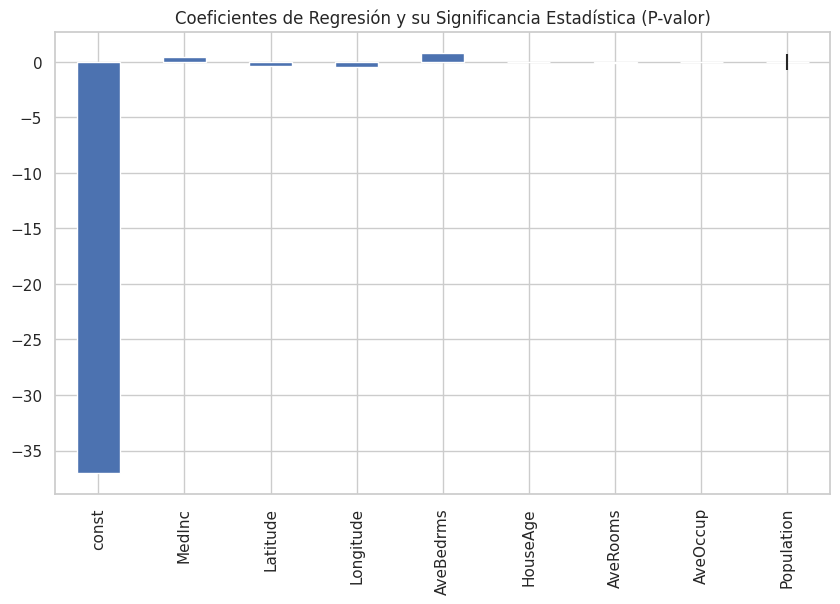

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau ## NO LINEALES
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# 3. Regresión Lineal con Statsmodels
# Agregar una constante (intercepto) para statsmodels
X_train_california_sm = sm.add_constant(X_train_california)
X_test_california_sm = sm.add_constant(X_test_california)

# Crear y entrenar el modelo
modelo_sm = sm.OLS(y_train_california, X_train_california_sm)  ## REGRESIÓN LINEAL CON STATS MODELS == LinearRegression() de scikit learn
resultados = modelo_sm.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

###verificamos resultados

# Predecir y calcular métricas de rendimiento
y_pred_sm = resultados.predict(X_test_california_sm)

# Calcular MSE, MAE y R^2
mse_sm = mean_squared_error(y_test_california, y_pred_sm)
mae_sm = mean_absolute_error(y_test_california, y_pred_sm)
r2_sm = resultados.rsquared

print(f"\nMétricas de evaluación para la Regresión Lineal con Statsmodels:")
print(f"MSE: {mse_sm:.4f}")
print(f"MAE: {mae_sm:.4f}")
print(f"R^2: {r2_sm:.4f}")

# Visualización de los coeficientes y su significancia
coeficientes = pd.DataFrame({'Coeficientes': resultados.params, 'P-valor': resultados.pvalues})
coeficientes.sort_values(by='P-valor', ascending=True, inplace=True)
coeficientes.plot(kind='bar', y='Coeficientes', yerr='P-valor', legend=False)
plt.title('Coeficientes de Regresión y su Significancia Estadística (P-valor)')
plt.show()



Ver que variables tiene significacnai estadistica

## 🔍 ¿Qué compara?

- **LinearRegression**  
  - Proporciona **coeficientes interpretables** con dirección.  
  - Permite saber si una variable tiene un efecto **positivo o negativo** sobre la variable objetivo.  

- **RandomForestRegressor**  
  - Modelo **robusto a relaciones no lineales** y a outliers.  
  - No proporciona dirección (signo), pero sí una **medida de importancia relativa** de cada variable en la predicción.  

---

## 🎯 Ideal para:

- Entender **qué variables influyen más** (y en qué dirección) sobre el valor de las casas.
- Comparar modelos **lineales vs. no lineales** en cuanto a la **interpretabilidad de las características**.


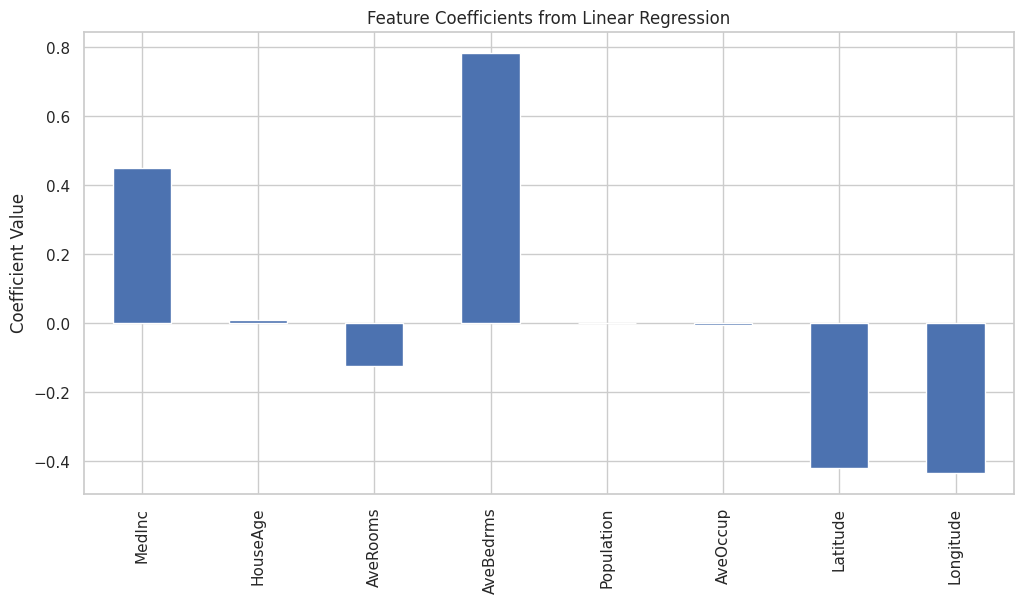

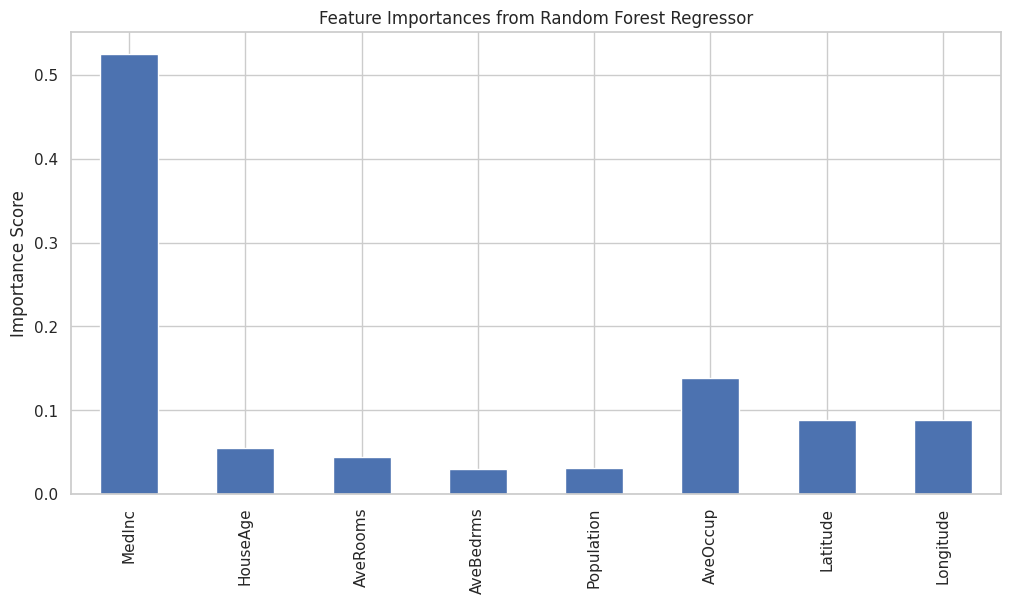

In [ ]:
# Step 1: Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Get the coefficients of the Linear Regression model
coefficients = pd.Series(linear_model.coef_, index=feature_names) # obtener los coeficiente

# Step 6: Fit a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Get the feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# Step 8: Plot the coefficients from the Linear Regression model
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar')
plt.title('Feature Coefficients from Linear Regression')
plt.ylabel('Coefficient Value')
plt.show()

# Step 9: Plot the feature importances from the Random Forest model
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest Regressor')
plt.ylabel('Importance Score')
plt.show()


## 🔍 ¿Es lo mismo comparar coeficientes que hacer PCA?

No. Aunque ambos enfoques ayudan a entender las variables, **no son equivalentes**. Aquí te explico por qué:

---

### 🧠 Diferencias entre Regresión / Random Forest y PCA

| Aspecto                          | Regresión Lineal / Random Forest                      | PCA (Análisis de Componentes Principales)              |
|----------------------------------|--------------------------------------------------------|--------------------------------------------------------|
| **Objetivo**                     | Predecir una variable objetivo (`y`)                  | Reducir la dimensionalidad del dataset (`X`)           |
| **Tipo de aprendizaje**          | **Supervisado**                                       | **No supervisado**                                     |
| **Interpretación**              | Coeficientes con dirección (±) o importancia relativa | Componentes lineales sin dirección ni relación directa |
| **Resultado**                    | Relevancia individual de variables originales         | Nuevas variables (componentes principales)             |
| **Significado de valores**       | Impacto sobre la predicción de `y`                    | Porcentaje de varianza explicada en `X`                |

---

### 🎯 Conclusión

- **Regresión lineal y Random Forest** te dicen **qué tan importante es cada variable para predecir** la salida.
- **PCA** te dice **cómo se combinan las variables** para explicar la **variación interna** del conjunto de datos, **sin considerar la variable objetivo**.
- Por tanto, **no son equivalentes**, pero **pueden complementarse**: PCA reduce dimensionalidad; modelos supervisados explican predicción.



# ALGO DE P VALUE

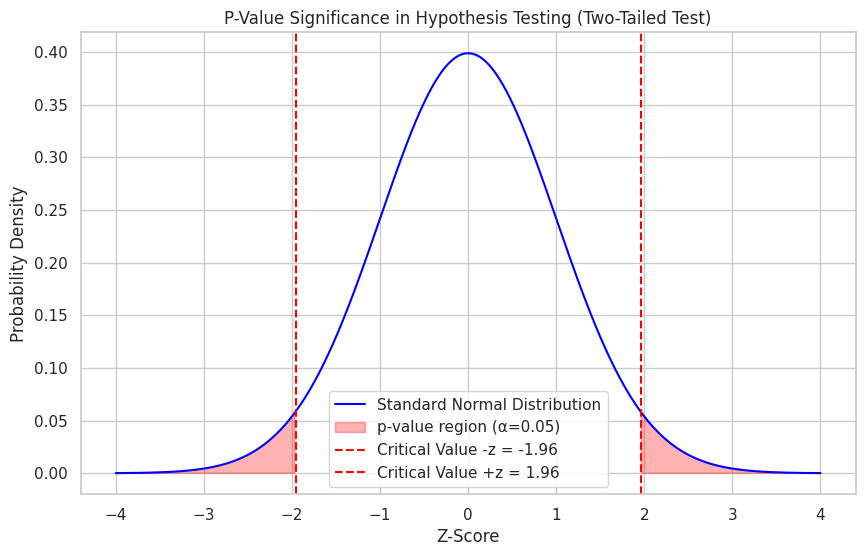

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for the x-axis
x = np.linspace(-4, 4, 1000)

# Standard normal distribution
y = norm.pdf(x)

# Significance level
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed test

# Plotting the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Shade the critical regions
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label='p-value region (α=0.05)')

# Annotate the critical value points
plt.axvline(-z_critical, color='red', linestyle='--', label=f'Critical Value -z = {-z_critical:.2f}')
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical Value +z = {z_critical:.2f}')

# Add labels and title
plt.title('P-Value Significance in Hypothesis Testing (Two-Tailed Test)')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


r2 = 0.613.  Significa 61% de Var de la variable objetivo es explicada por la varianza de las variables del dataset


P-value = métrica que permite estimar la probabilidad de que los resultados sean debidos al azar y determinar si los hallazgos de un experimento son estadísticamente significativos. P<0.05.


Si el p-value es mayor a 0.05 ==> resultados se deban a ruido o simplemente al azar.

En esta lección, se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión. En cada código, el conjunto de datos se descarga directamente del repositorio de UCI Machine Learning.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

✅ ¿Para qué sirve esto?

1. Identificar las variables más relevantes en la clasificación de pacientes con diabetes.

2. Permite reducción de dimensionalidad (quitar las menos importantes).

3. Ayuda a explicar el modelo a profesionales médicos o analistas.

## ℹ️ Descripción de Variables del Dataset Pima Indians Diabetes

- **`preg`**: *Número de embarazos*  
  → Cantidad de veces que la paciente ha estado embarazada.

- **`plas`**: *Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa*  
  → Medición clave para detectar intolerancia a la glucosa o diabetes.

- **`pres`**: *Presión arterial diastólica (mm Hg)*  
  → Segunda cifra en una lectura de presión arterial (cuando el corazón está en reposo entre latidos).

- **`skin`**: *Grosor del pliegue cutáneo del tríceps (mm)*  
  → Estimación indirecta de grasa subcutánea, usada para calcular composición corporal.

- **`test`**: *Nivel de insulina sérica a las 2h (mu U/ml)*  
  → Cantidad de insulina presente en sangre después de una prueba de glucosa.

- **`mass`**: *Índice de Masa Corporal (IMC)*  
  → Peso (kg) dividido por altura (m²), indicador estándar de obesidad.

- **`pedi`**: *Función de Pedigrí de Diabetes*  
  → Representa la predisposición genética a la diabetes (basado en historia familiar).

- **`age`**: *Edad en años*  
  → Edad de la paciente.

- **`class`**: *Diagnóstico de diabetes (0 = No, 1 = Sí)*  
  → Variable objetivo a predecir: indica si la paciente presenta diabetes o no.


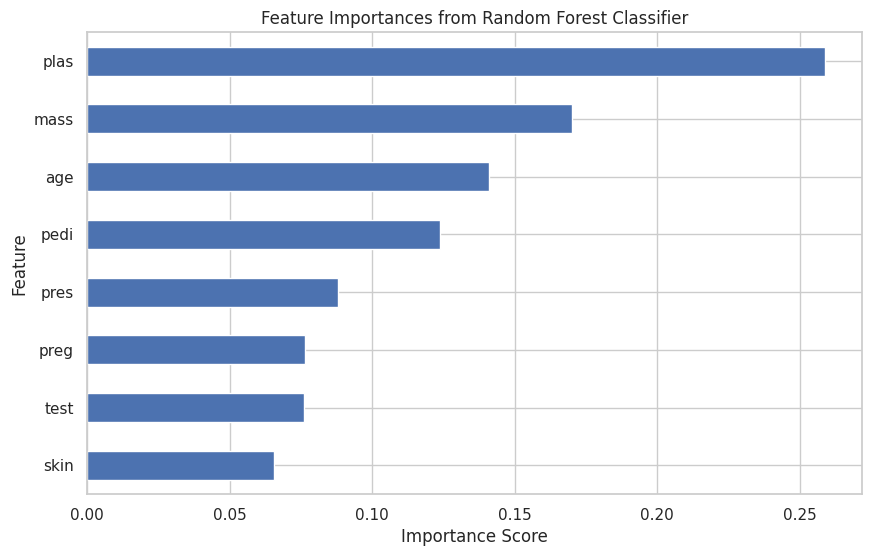

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 2: Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/'
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_cla = pd.read_csv(f"{path}{filename}", names=names)

# Convertir DataFrame a un array de valores
array = df_cla.values

# Step 3: Split the data into features (X_cla) and target (Y_cla)
array = df_cla.values
X_cla = array[:, 0:8]
Y_cla = array[:, 8]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, Y_cla, test_size=0.2, random_state=42)

# Step 5: Fit a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Get the feature importances from the Random Forest model
importances = rf_classifier.feature_importances_

# Step 7: Create a pandas series with the feature names and their corresponding importances
feature_importances = pd.Series(importances, index=names[:-1])

# Step 8: Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## 🔄 Comparación entre Regresión Logística y Random Forest

| Variable | Coef. Logístico | Interpretación (Logística)                         | Importancia RF | Interpretación (Random Forest)                          |
|----------|------------------|---------------------------------------------------|----------------|----------------------------------------------------------|
| `plas`   | +0.0341          | Fuerte asociación positiva                        | **0.26**       | 🔝 Más importante, relación directa con diabetes          |
| `mass`   | +0.1026          | Asociación positiva moderada                      | **0.17**       | Alta importancia, relevante clínicamente                 |
| `age`    | +0.0371          | Relación positiva moderada                        | **0.13**       | Relevancia alta, riesgo crece con edad                   |
| `pedi`   | +0.6273          | Asociación positiva **fuerte**, familiaridad      | **0.11**       | Importancia moderada                                     |
| `pres`   | –0.0139          | Asociación negativa leve                          | **0.09**       | Baja-media importancia                                   |
| `preg`   | +0.0645          | Positiva leve                                     | **0.08**       | Importancia moderada                                     |
| `test`   | –0.0018          | Negativa muy débil, posiblemente irrelevante      | **0.08**       | Baja relevancia                                           |
| `skin`   | +0.0033          | Positiva débil, probablemente prescindible        | **0.07**       | 🔽 Menor importancia en el modelo                        |

---

### ✅ Conclusión Comparativa

- **Ambos modelos coinciden** en que `plas` (glucosa) y `mass` (IMC) son las variables más importantes.
- En regresión logística, `pedi` resalta más por su fuerte coeficiente, mientras que en Random Forest **pierde prioridad** relativa.
- Variables como `skin` y `test` tienen **bajo impacto en ambos modelos**, lo cual las vuelve candidatas para exclusión en versiones simplificadas.



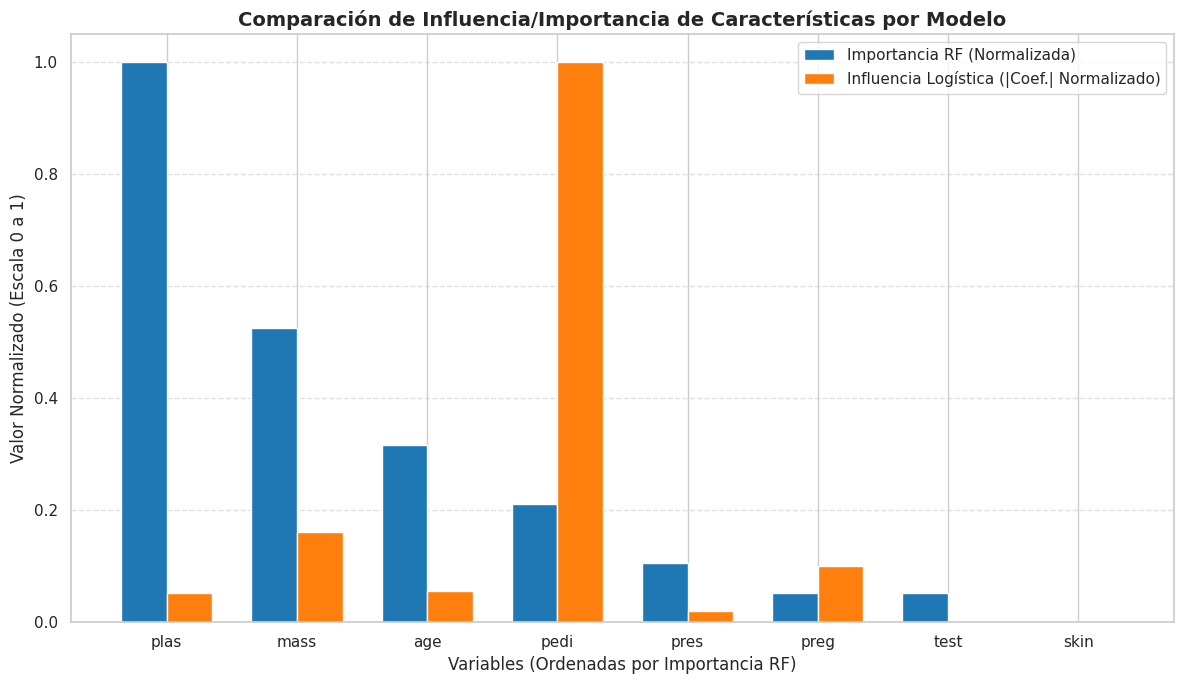

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Crear el DataFrame con los datos de la imagen
data = {
    'Variable': ['plas', 'mass', 'age', 'pedi', 'pres', 'preg', 'test', 'skin'],
    'Coef. Logístico': [0.0341, 0.1026, 0.0371, 0.6273, -0.0139, 0.0645, -0.0018, 0.0033],
    'Importancia RF': [0.26, 0.17, 0.13, 0.11, 0.09, 0.08, 0.08, 0.07]
}
df_comp = pd.DataFrame(data)

# 2. Preparar los datos para la gráfica

# Usar el valor absoluto de los coeficientes para medir la magnitud de la influencia
df_comp['|Coef. Logístico|'] = df_comp['Coef. Logístico'].abs()

# Normalizar las dos métricas (Importancia RF y |Coef. Logístico|) a una escala de 0 a 1
# para que sean visualmente comparables en el mismo gráfico.
scaler = MinMaxScaler()
# Normalizar Coeficientes
df_comp['|Coef. Logístico| Normalizado'] = scaler.fit_transform(
    df_comp[['|Coef. Logístico|']]
)
# Normalizar Importancia RF
df_comp['Importancia RF Normalizada'] = scaler.fit_transform(
    df_comp[['Importancia RF']]
)

# Ordenar por Importancia RF para la visualización
df_comp = df_comp.sort_values(by='Importancia RF', ascending=False)

# 3. Configuración de la Gráfica de Barras Agrupadas

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
index = np.arange(len(df_comp))

# Barras para Random Forest (RF)
bar1 = ax.bar(index, df_comp['Importancia RF Normalizada'], bar_width,
              label='Importancia RF (Normalizada)', color='#1f77b4')

# Barras para Regresión Logística (Logístico)
bar2 = ax.bar(index + bar_width, df_comp['|Coef. Logístico| Normalizado'], bar_width,
              label='Influencia Logística (|Coef.| Normalizado)', color='#ff7f0e')

# 4. Etiquetas y Títulos

ax.set_xlabel('Variables (Ordenadas por Importancia RF)', fontsize=12)
ax.set_ylabel('Valor Normalizado (Escala 0 a 1)', fontsize=12)
ax.set_title('Comparación de Influencia/Importancia de Características por Modelo', fontsize=14, weight='bold')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_comp['Variable'])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#¿Qué es treeinterpreter?

Una librería que explica “por qué” un modelo de árboles (p. ej., RandomForest) dio una predicción para un caso específico.
Divide la predicción en:

Predicción = promedio del modelo (bias) + aportes de cada feature

Piensa en una báscula: el bias es el punto de partida, y cada feature empuja hacia arriba o abajo la predicción.

¿Qué te da?

Para una fila 𝑥𝑖:

Bias: el valor base del modelo (p. ej., media de 𝑦 o probas base por clase).

Contribución de cada feature: cuánto sumó o restó esa variable para llegar a la predicción final.

En clasificación: contribuciones a cada probabilidad de clase.

En regresión: contribuciones al valor numérico predicho.

Predicción del modelo: [[0.69 0.31]]
Valor esperado (Bias): [[0.65462541 0.34537459]]
Contribuciones de cada característica a la predicción:
      Contribución Clase 0  Contribución Clase 1
preg                0.0091               -0.0091
plas                0.1948               -0.1948
pres                0.0356               -0.0356
skin                0.0019               -0.0019
test               -0.0618                0.0618
mass               -0.0245                0.0245
pedi                0.0184               -0.0184
age                -0.1381                0.1381


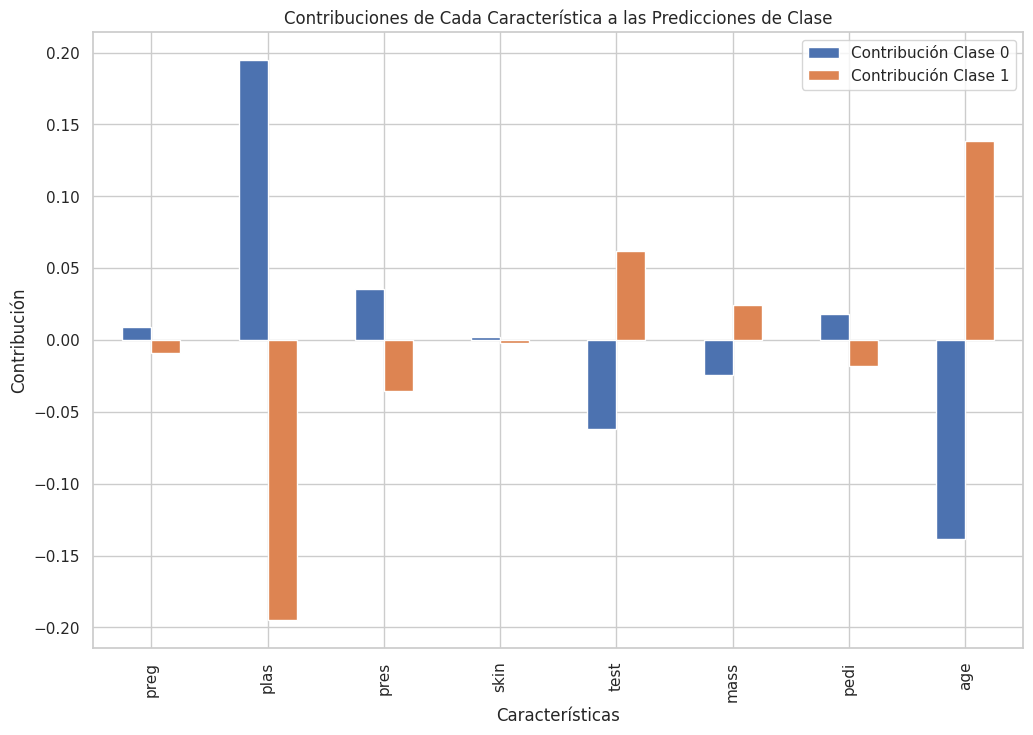

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti #FEAUTRE IMPORTANCES IDEAL EN RANDOM FOREST
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Leer el archivo CSV
df_cla = pd.read_csv(path, names=names)

# Convertir DataFrame a un array de valores
array = df_cla.values  # Definir 'array' aquí

# Step 3: Dividir los datos en características (X_cla) y el objetivo (Y_cla)
X_cla = array[:, 0:8]  # Características
Y_cla = array[:, 8]    # Objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_cla, X_test_cla, Y_train_cla, Y_test_cla = train_test_split(X_cla, Y_cla, test_size=0.2, random_state=42)

# Entrenar el modelo de RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cla, Y_train_cla)

# Utilizar Treeinterpreter para descomponer la predicción
instance = X_test_cla[0:1]  # Ejemplo con la primera muestra del conjunto de prueba
prediction, bias, contributions = ti.predict(rf_clf, instance)

# Imprimir los resultados
print("Predicción del modelo:", prediction)
print("Valor esperado (Bias):", bias)
print("Contribuciones de cada característica a la predicción:")

# Crear un DataFrame para visualizar mejor las contribuciones para ambas clases
contrib_df = pd.DataFrame(contributions[0], columns=['Contribución Clase 0', 'Contribución Clase 1'])
contrib_df.index = names[:8]  # Nombres de las características
contrib_df = contrib_df.round(4)  # Redondear para mejor visualización

print(contrib_df)

# Visualizar las contribuciones de cada característica para cada clase
contrib_df.plot(kind='bar', figsize=(12, 8))
plt.title('Contribuciones de Cada Característica a las Predicciones de Clase')
plt.xlabel('Características')
plt.ylabel('Contribución')
plt.show()

# 0 Si Los pesos positivos aumentan la probabilidad de ser diabetico
# 1 NO




## 🌲 Comparación de Algoritmos de Árboles y Tratamiento de Variables Categóricas

### 🔍 ¿Cómo manejan las variables categóricas?

| Modelo         | ¿Acepta variables categóricas directamente? | Observaciones clave                                                |
|----------------|---------------------------------------------|---------------------------------------------------------------------|
| **CatBoost**   | ✅ **Sí**                                   | - Excelente para variables categóricas<br>- No requiere codificación previa |
| **XGBoost**    | ❌ **No**                                   | - Muy potente<br>- Requiere codificación (`One-Hot`, `LabelEncoding`)<br>- Requiere *fine-tuning* de hiperparámetros<br>- Basado en **Boosting** (aprendizaje secuencial, no promedio) |
| **Random Forest** | ❌ **No**                                | - Robusto y fácil de usar<br>- Requiere codificación previa<br>- Basado en **Bagging** (promedia árboles, menos overfitting)<br>- No necesita mucho ajuste de hiperparámetros |

---

### 🧩 Métodos de Codificación para Variables Categóricas

| Técnica            | ¿Cuándo usarla?                                    |
|--------------------|----------------------------------------------------|
| **One-Hot Encoding** (`pd.get_dummies`) | - Cuando las categorías son **pocas y no ordinales**<br>- Produce columnas binarias para cada categoría |
| **Label Encoding**  | - Útil si el modelo puede entender orden o jerarquía<br>- O para modelos como CatBoost que manejan internamente estas etiquetas |
| ⚠️ **Evitar uso directo de IDs o categorías con alta cardinalidad sin transformación** → puede inducir **overfitting**

---

### ✅ Recomendación

- Si tienes variables categóricas **no binarias** y usas **XGBoost** o **Random Forest**, debes codificarlas previamente (ej: `get_dummies`).
- Si usas **CatBoost**, simplemente pásalas como `dtype='category'` sin preocuparte por la codificación manual.



Predicción del modelo: [[0.03 0.97]]
Valor esperado (Bias): [[0.36793407 0.63206593]]
Contribuciones de cada característica a la predicción:
                         Contribución Clase 0  Contribución Clase 1
worst area                            -0.0746                0.0746
worst concave points                  -0.0570                0.0570
mean concave points                   -0.0474                0.0474
worst radius                          -0.0424                0.0424
worst perimeter                       -0.0236                0.0236
mean area                             -0.0203                0.0203
mean concavity                        -0.0195                0.0195
mean radius                           -0.0174                0.0174
worst compactness                     -0.0090                0.0090
worst texture                         -0.0084                0.0084
mean perimeter                        -0.0083                0.0083
mean texture                          -0.00

<Figure size 1000x800 with 0 Axes>

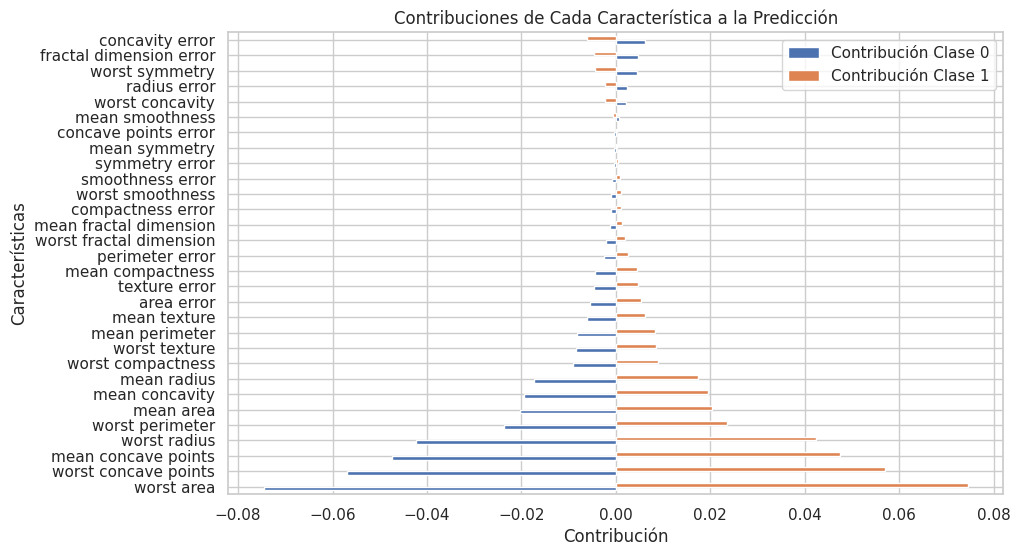

In [ ]:
# Importar librerías necesarias
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset de ejemplo (Cáncer de Mama)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Utilizar Treeinterpreter para descomponer la predicción
instance = X_test.iloc[0:1]  # Ejemplo con la primera muestra del conjunto de prueba
prediction, bias, contributions = ti.predict(rf_clf, instance)

# Imprimir los resultados
print("Predicción del modelo:", prediction)
print("Valor esperado (Bias):", bias)
print("Contribuciones de cada característica a la predicción:")

# Crear un DataFrame para visualizar mejor las contribuciones
# The contributions array has two columns: contributions for class 0 and class 1
# We need to specify column names for both
contrib_df = pd.DataFrame(contributions[0], columns=['Contribución Clase 0', 'Contribución Clase 1'])
contrib_df.index = X.columns
contrib_df = contrib_df.round(4)  # Redondear para mejor visualización
contrib_df = contrib_df.sort_values(by='Contribución Clase 1', ascending=False) # Sort by contributions to class 1, adjust as needed

print(contrib_df)

# Visualizar las contribuciones de forma gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
contrib_df.plot(kind='barh', legend=True) # Show legend to distinguish contributions to different classes
plt.title('Contribuciones de Cada Característica a la Predicción')
plt.xlabel('Contribución')
plt.ylabel('Características')
plt.show()

# 2. Técnicas de Feature selection</font>

la selección de las funciones correctas en sus datos puede significar la diferencia entre un rendimiento mediocre con largos tiempos de entrenamiento y un gran rendimiento con tiempos de entrenamiento cortos. Como dice el principio de Occam's Razor:

*Los modelos más simples son los mejores.*

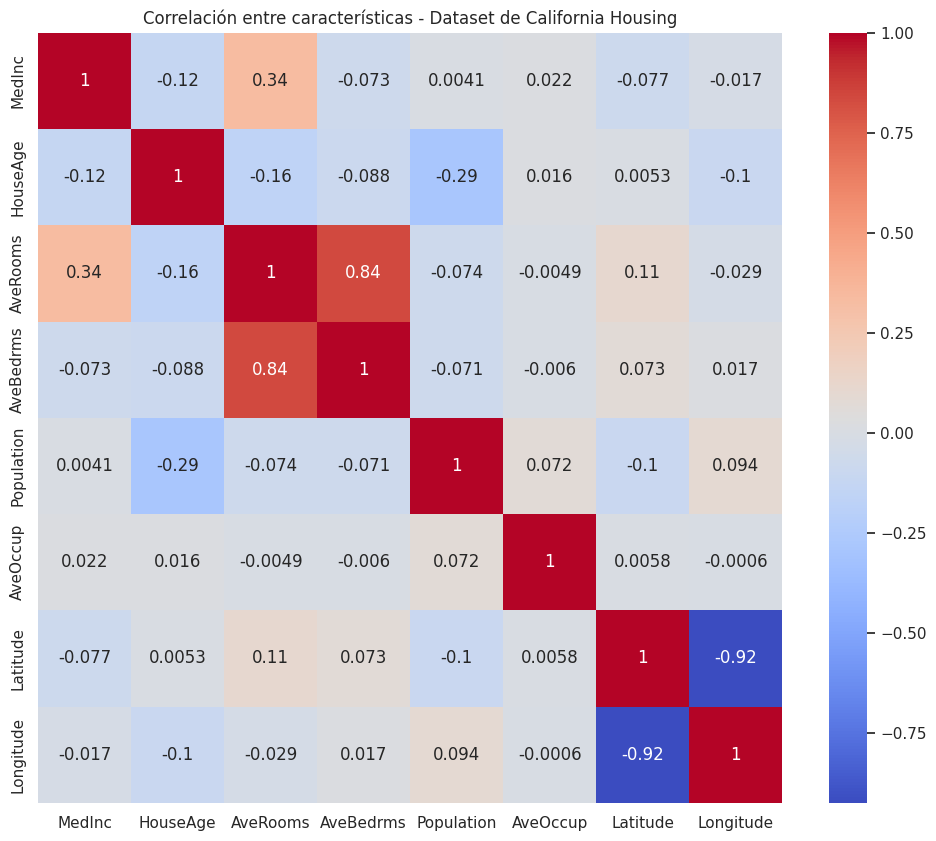

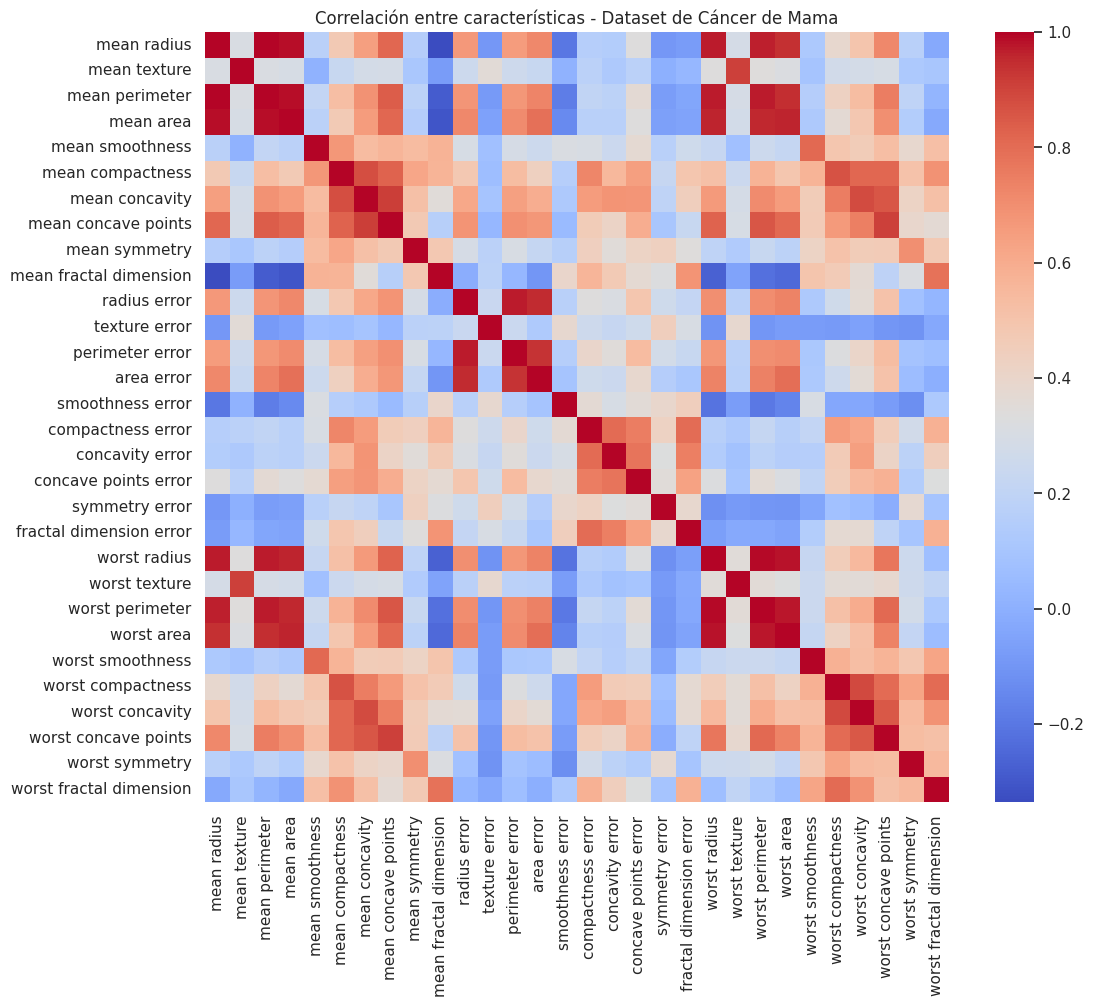

MSE para regresión lineal (California Housing): 0.5558915986952444


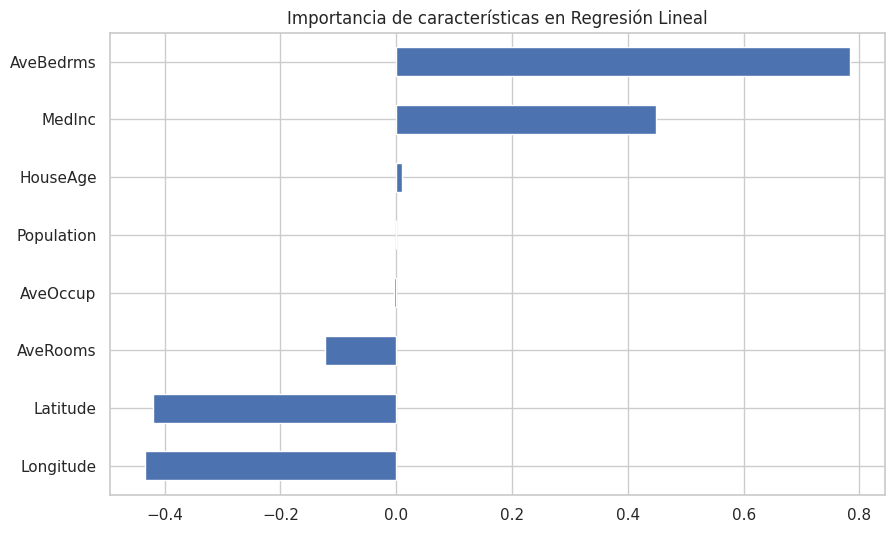

Accuracy para regresión logística (Cáncer de Mama): 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



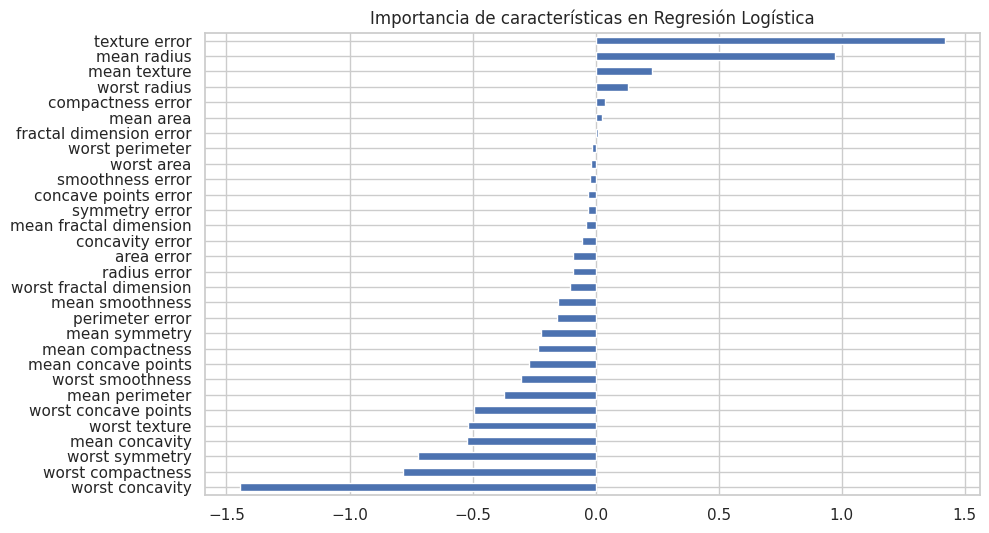

Accuracy para Random Forest (Cáncer de Mama): 0.9649122807017544


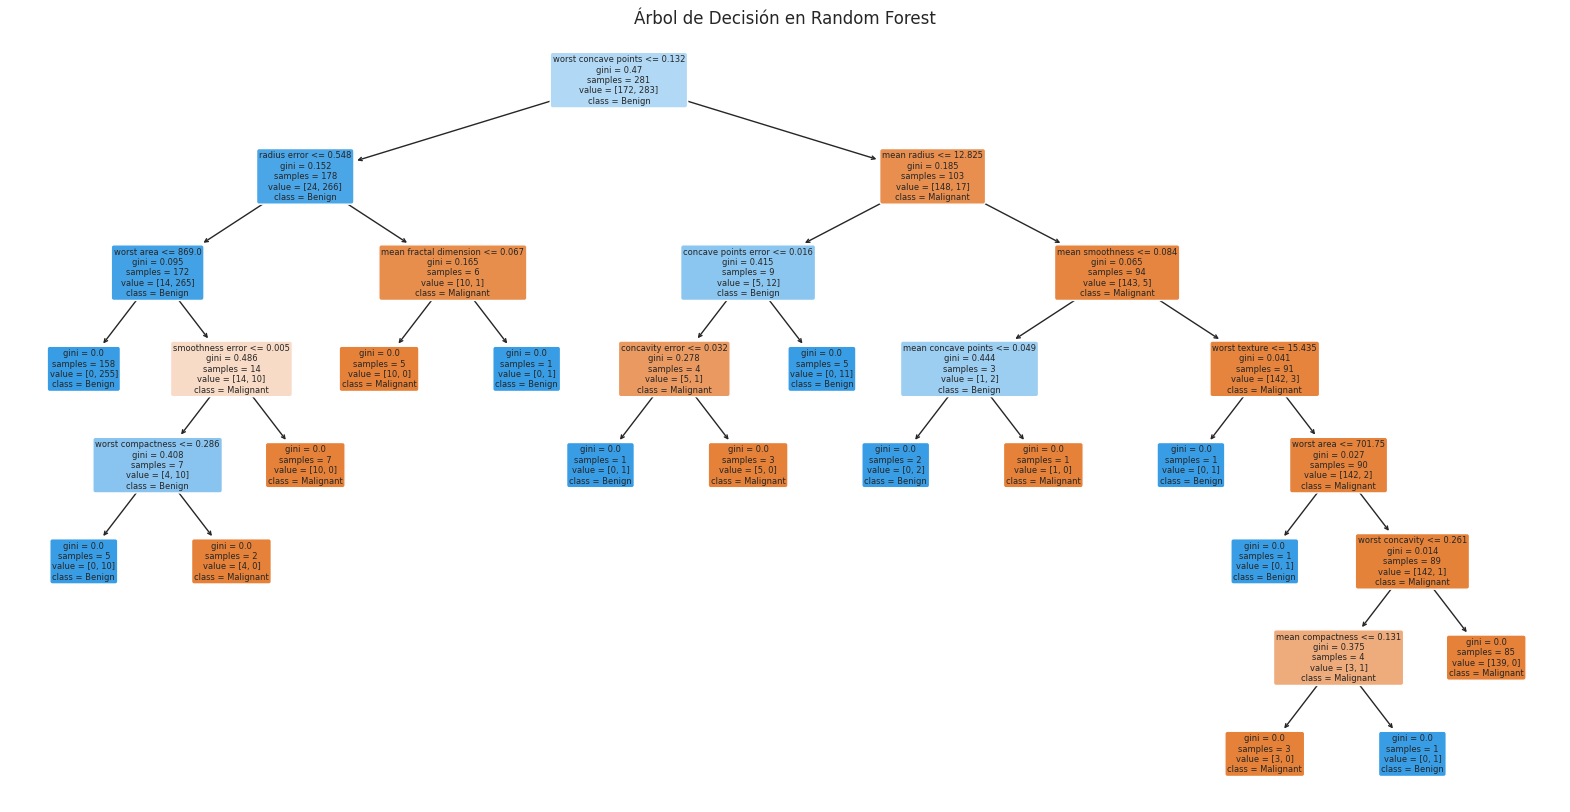

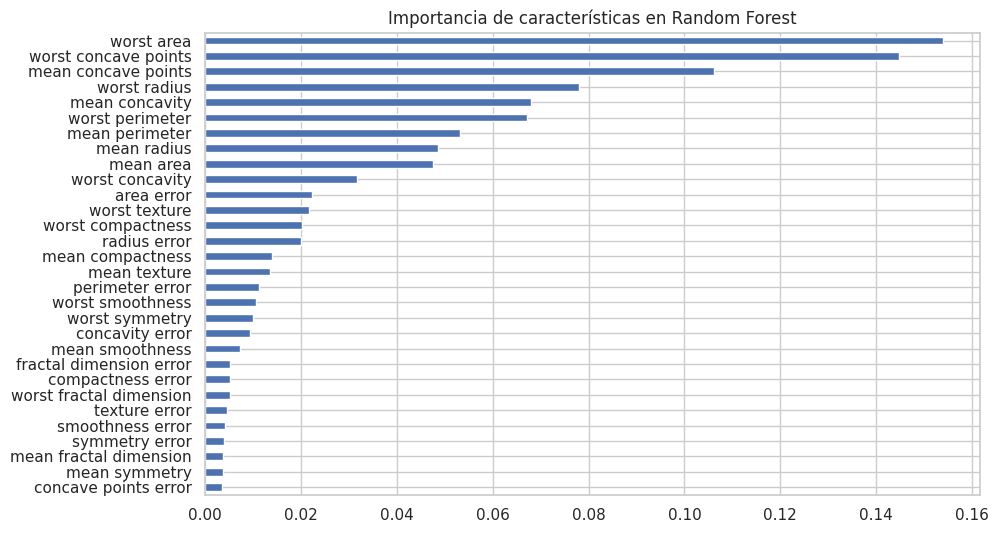

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:37:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy para XGBoost (Cáncer de Mama): 0.956140350877193


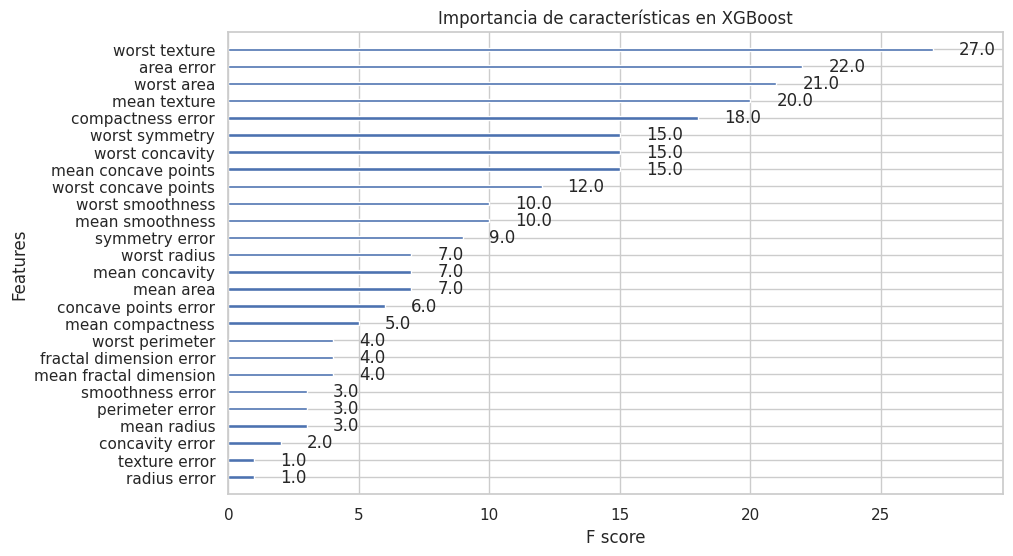

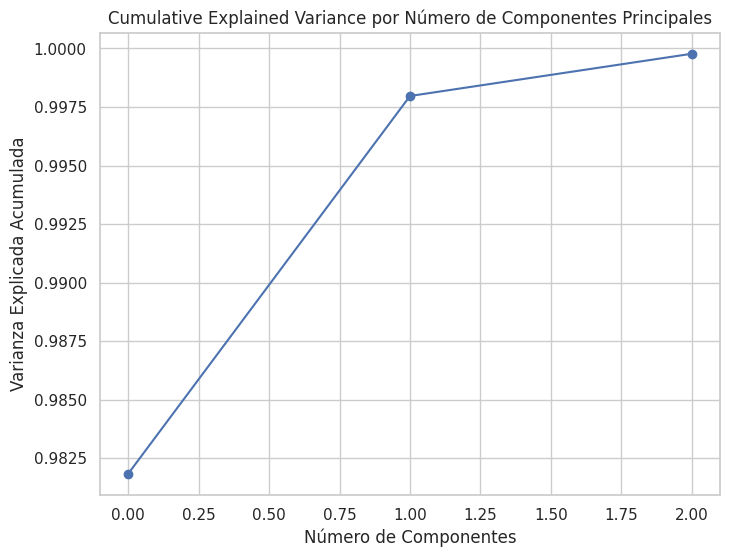

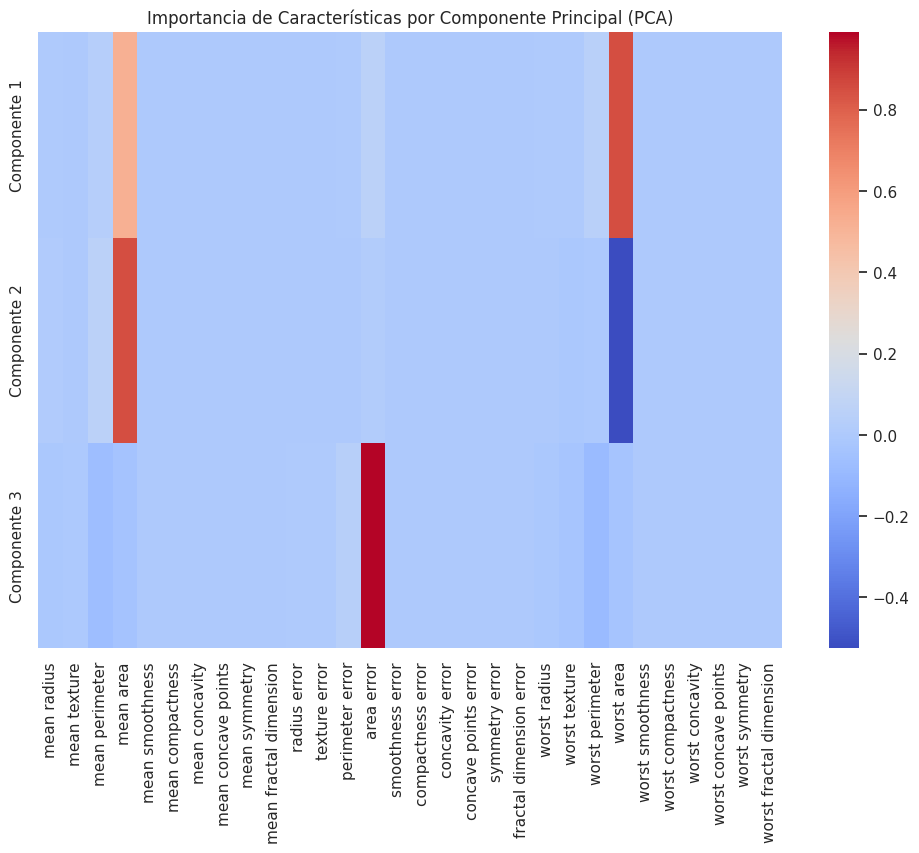

<Figure size 1200x800 with 0 Axes>

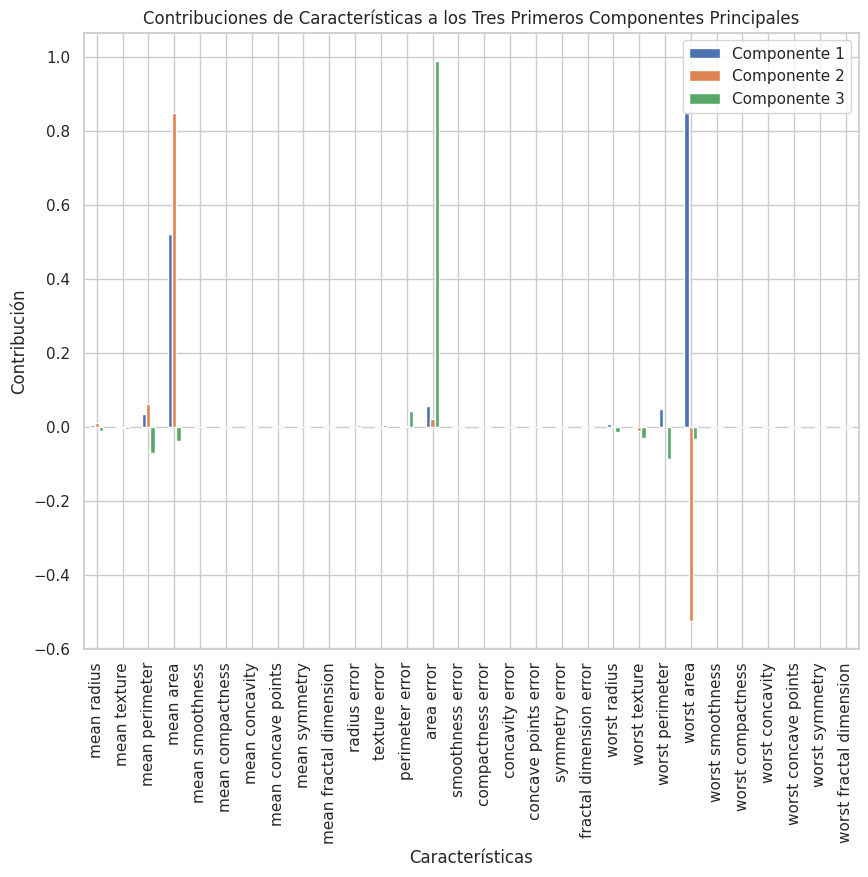

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import shap

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# 3. Evaluar la correlación entre características
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_california.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre características - Dataset de California Housing')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(X_train_cancer.corr(), annot=False, cmap='coolwarm')
plt.title('Correlación entre características - Dataset de Cáncer de Mama')
plt.show()

# 4. Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_california, y_train_california)
y_pred_california = lin_reg.predict(X_test_california)
mse = mean_squared_error(y_test_california, y_pred_california)
print(f"MSE para regresión lineal (California Housing): {mse}")

# Visualización de coeficientes
coefficients = pd.Series(lin_reg.coef_, index=X_train_california.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Importancia de características en Regresión Lineal')
plt.show()

# 5. Regresión Logística
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = log_reg.predict(X_test_cancer)
acc = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Accuracy para regresión logística (Cáncer de Mama): {acc}")
print(classification_report(y_test_cancer, y_pred_cancer))

# Visualización de coeficientes
coefficients = pd.Series(log_reg.coef_[0], index=X_train_cancer.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Importancia de características en Regresión Logística')
plt.show()

# 6. Árbol de Decisión y Random Forest
# Clasificación con Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cancer, y_train_cancer)
y_pred_rf_cancer = rf_clf.predict(X_test_cancer)
acc_rf = accuracy_score(y_test_cancer, y_pred_rf_cancer)
print(f"Accuracy para Random Forest (Cáncer de Mama): {acc_rf}")

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], feature_names=X_train_cancer.columns, filled=True, rounded=True, class_names=['Malignant', 'Benign'])
plt.title('Árbol de Decisión en Random Forest')
plt.show()

# Importancia de características en Random Forest
importances_rf = pd.Series(rf_clf.feature_importances_, index=X_train_cancer.columns)
importances_rf.sort_values().plot(kind='barh')
plt.title('Importancia de características en Random Forest')
plt.show()

# 7. XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_cancer, y_train_cancer)
y_pred_xgb_cancer = xgb_clf.predict(X_test_cancer)
acc_xgb = accuracy_score(y_test_cancer, y_pred_xgb_cancer)
print(f"Accuracy para XGBoost (Cáncer de Mama): {acc_xgb}")

# Importancia de características en XGBoost
plot_importance(xgb_clf)
plt.title('Importancia de características en XGBoost')
plt.show()

# 8. PCA para la importancia de características con 3 componentes principales
pca = PCA(n_components=3)  # Limitar a 3 componentes principales #USANDO 3 COMPONENTES PRINCIPALES.
X_pca = pca.fit_transform(X_train_cancer)

# Gráfica de Varianza Explicada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance por Número de Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Importancia de características por componente principal
pca_components = pd.DataFrame(pca.components_, columns=X_train_cancer.columns)
pca_components.index = [f'Componente {i+1}' for i in range(len(pca_components))]

# Gráfico de Importancia de Características por Componente Principal
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, cmap='coolwarm', fmt=".2f")
plt.title('Importancia de Características por Componente Principal (PCA)')
plt.show()

# Visualizar contribuciones de las características a los tres componentes principales
plt.figure(figsize=(12, 8))
pca_components.T.plot(kind='bar', figsize=(10, 8))
plt.title('Contribuciones de Características a los Tres Primeros Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Contribución')
plt.xticks(rotation=90)
plt.show()


--- 📊 Rendimiento y Comparación de Modelos de Clasificación ---

Tabla de Accuracy:
                Modelo  Accuracy
0  Regresión Logística  0.973684
1        Random Forest  0.964912
2              XGBoost  0.956140


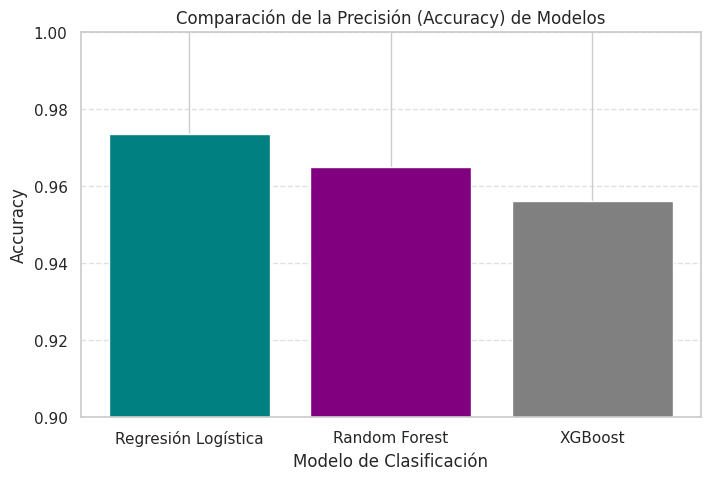


--- 🌳 Importancia de Características (Random Forest y Regresión Logística) ---


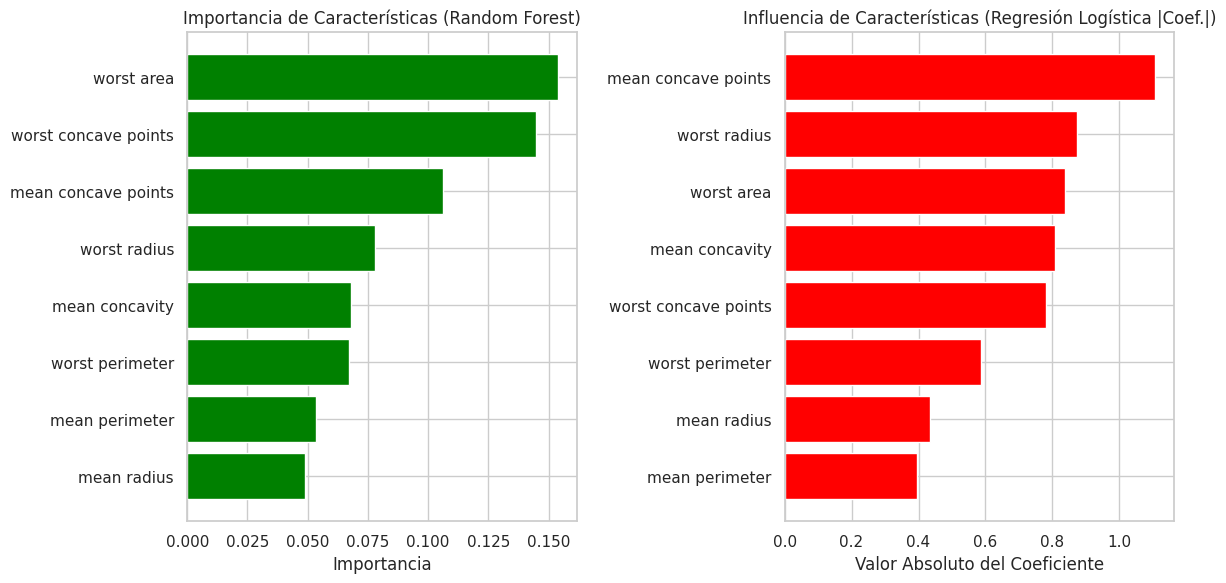


--- 📉 Análisis de Componentes Principales (PCA) ---


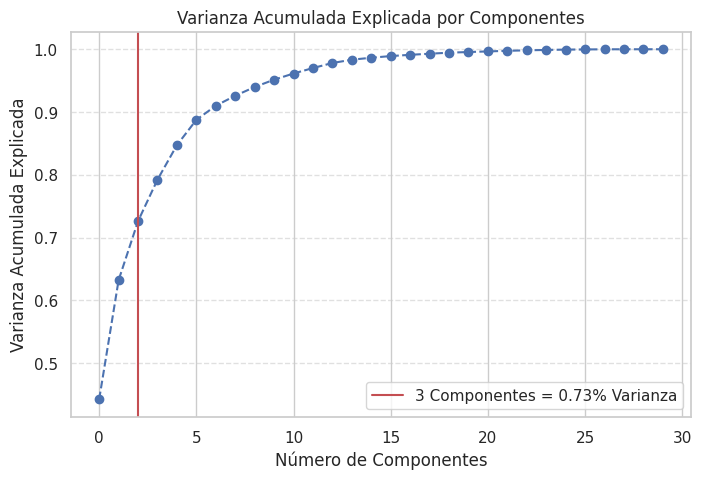

La varianza total explicada por los 3 componentes es: 0.7264


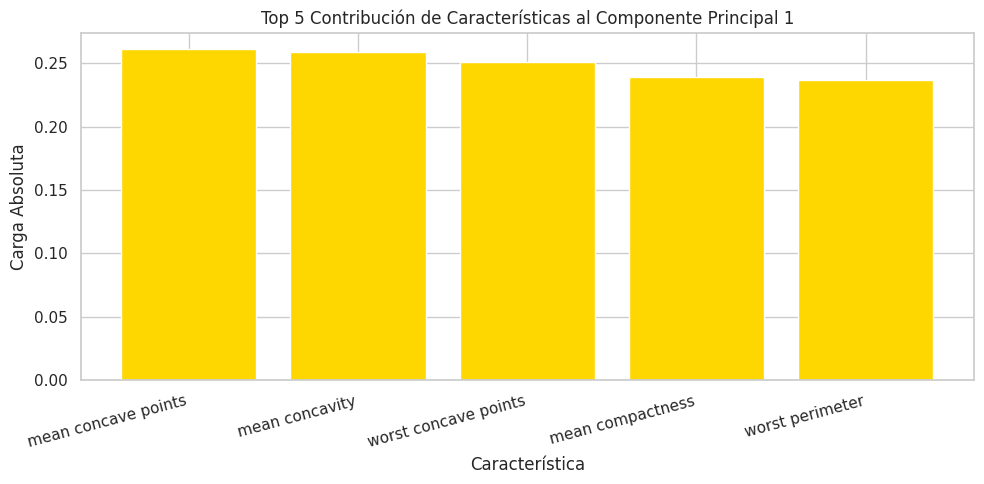

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore") # Ignorar advertencias de convergencia

# --- 1. Carga, Preparación y Modelado ---

# Cargar el dataset de clasificación
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

# Escalado de datos: Crucial para modelos lineales (Regresión Logística) y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Definición de modelos a comparar
models = {
    "Regresión Logística": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {'Modelo': [], 'Accuracy': []}
importance_data = []

# Entrenamiento y evaluación de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results['Modelo'].append(name)
    results['Accuracy'].append(acc)

    # Recopilar la influencia de las características para la visualización posterior
    if name == "Regresión Logística":
        # Para modelos lineales, usamos el valor absoluto de los coeficientes como influencia
        influence = np.abs(model.coef_[0])
    else:
        # Para modelos basados en árboles, usamos la importancia de la característica
        influence = model.feature_importances_

    df_temp = pd.DataFrame({
        'Feature': feature_names,
        'Influence': influence,
        'Model': name
    })
    importance_data.append(df_temp)

# --- 2. Visualización de la Comparación de Modelos ---

print("--- 📊 Rendimiento y Comparación de Modelos de Clasificación ---")

# Dataframe de resultados para la tabla y gráfico de Accuracy
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nTabla de Accuracy:")
print(results_df)

# Gráfico de Precisión (Accuracy)
plt.figure(figsize=(8, 5))
plt.bar(results_df['Modelo'], results_df['Accuracy'], color=['teal', 'purple', 'gray'])
plt.title('Comparación de la Precisión (Accuracy) de Modelos')
plt.xlabel('Modelo de Clasificación')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0) # Enfocar el rango superior de desempeño
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Gráfico de Importancia de Características (Focus: Random Forest)
print("\n--- 🌳 Importancia de Características (Random Forest y Regresión Logística) ---")
all_importance = pd.concat(importance_data)

# Aislar las 8 características más importantes de Random Forest para la visualización
rf_top_8_features = all_importance[all_importance['Model'] == 'Random Forest'].sort_values(
    by='Influence', ascending=False
).head(8)['Feature'].tolist()

plot_df = all_importance[all_importance['Feature'].isin(rf_top_8_features)]

plt.figure(figsize=(12, 6))

# Subplot para la Importancia de Random Forest
plt.subplot(1, 2, 1)
rf_plot = plot_df[plot_df['Model'] == 'Random Forest'].sort_values(by='Influence', ascending=True)
plt.barh(rf_plot['Feature'], rf_plot['Influence'], color='green')
plt.title('Importancia de Características (Random Forest)')
plt.xlabel('Importancia')

# Subplot para la Influencia de Regresión Logística (coeficientes absolutos)
plt.subplot(1, 2, 2)
lr_plot = plot_df[plot_df['Model'] == 'Regresión Logística'].sort_values(by='Influence', ascending=True)
plt.barh(lr_plot['Feature'], lr_plot['Influence'], color='red')
plt.title('Influencia de Características (Regresión Logística |Coef.|)')
plt.xlabel('Valor Absoluto del Coeficiente')

plt.tight_layout()
plt.show()

# --- 3. Análisis de Componentes Principales (PCA) ---

print("\n--- 📉 Análisis de Componentes Principales (PCA) ---")

# PCA completo para analizar la varianza explicada acumulada
pca_full = PCA()
pca_full.fit(X_scaled)

# Gráfico de Varianza Acumulada Explicada
plt.figure(figsize=(8, 5))
# Se muestra el % de varianza que se explica al añadir más componentes
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada por Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
# Marcar las 3 componentes (el índice 2 es el tercer componente)
plt.axvline(x=2, color='r', linestyle='-', label=f'3 Componentes = {np.cumsum(pca_full.explained_variance_ratio_)[2]:.2f}% Varianza')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Aplicar PCA con 3 componentes para el análisis de contribuciones (loadings)
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Generar un DataFrame con la contribución de las variables a los componentes
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=feature_names)

print(f"La varianza total explicada por los 3 componentes es: {pca.explained_variance_ratio_.sum():.4f}")

# Gráfico de Contribución de Características al PC1 (el más importante)
# Usamos el valor absoluto para ver qué características definen más al componente
loadings_abs_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
plt.bar(loadings_abs_pc1.index, loadings_abs_pc1.values, color='gold')
plt.title('Top 5 Contribución de Características al Componente Principal 1')
plt.xlabel('Característica')
plt.ylabel('Carga Absoluta')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

#### CORRELACIONES LINEALES Y NO LINEALES

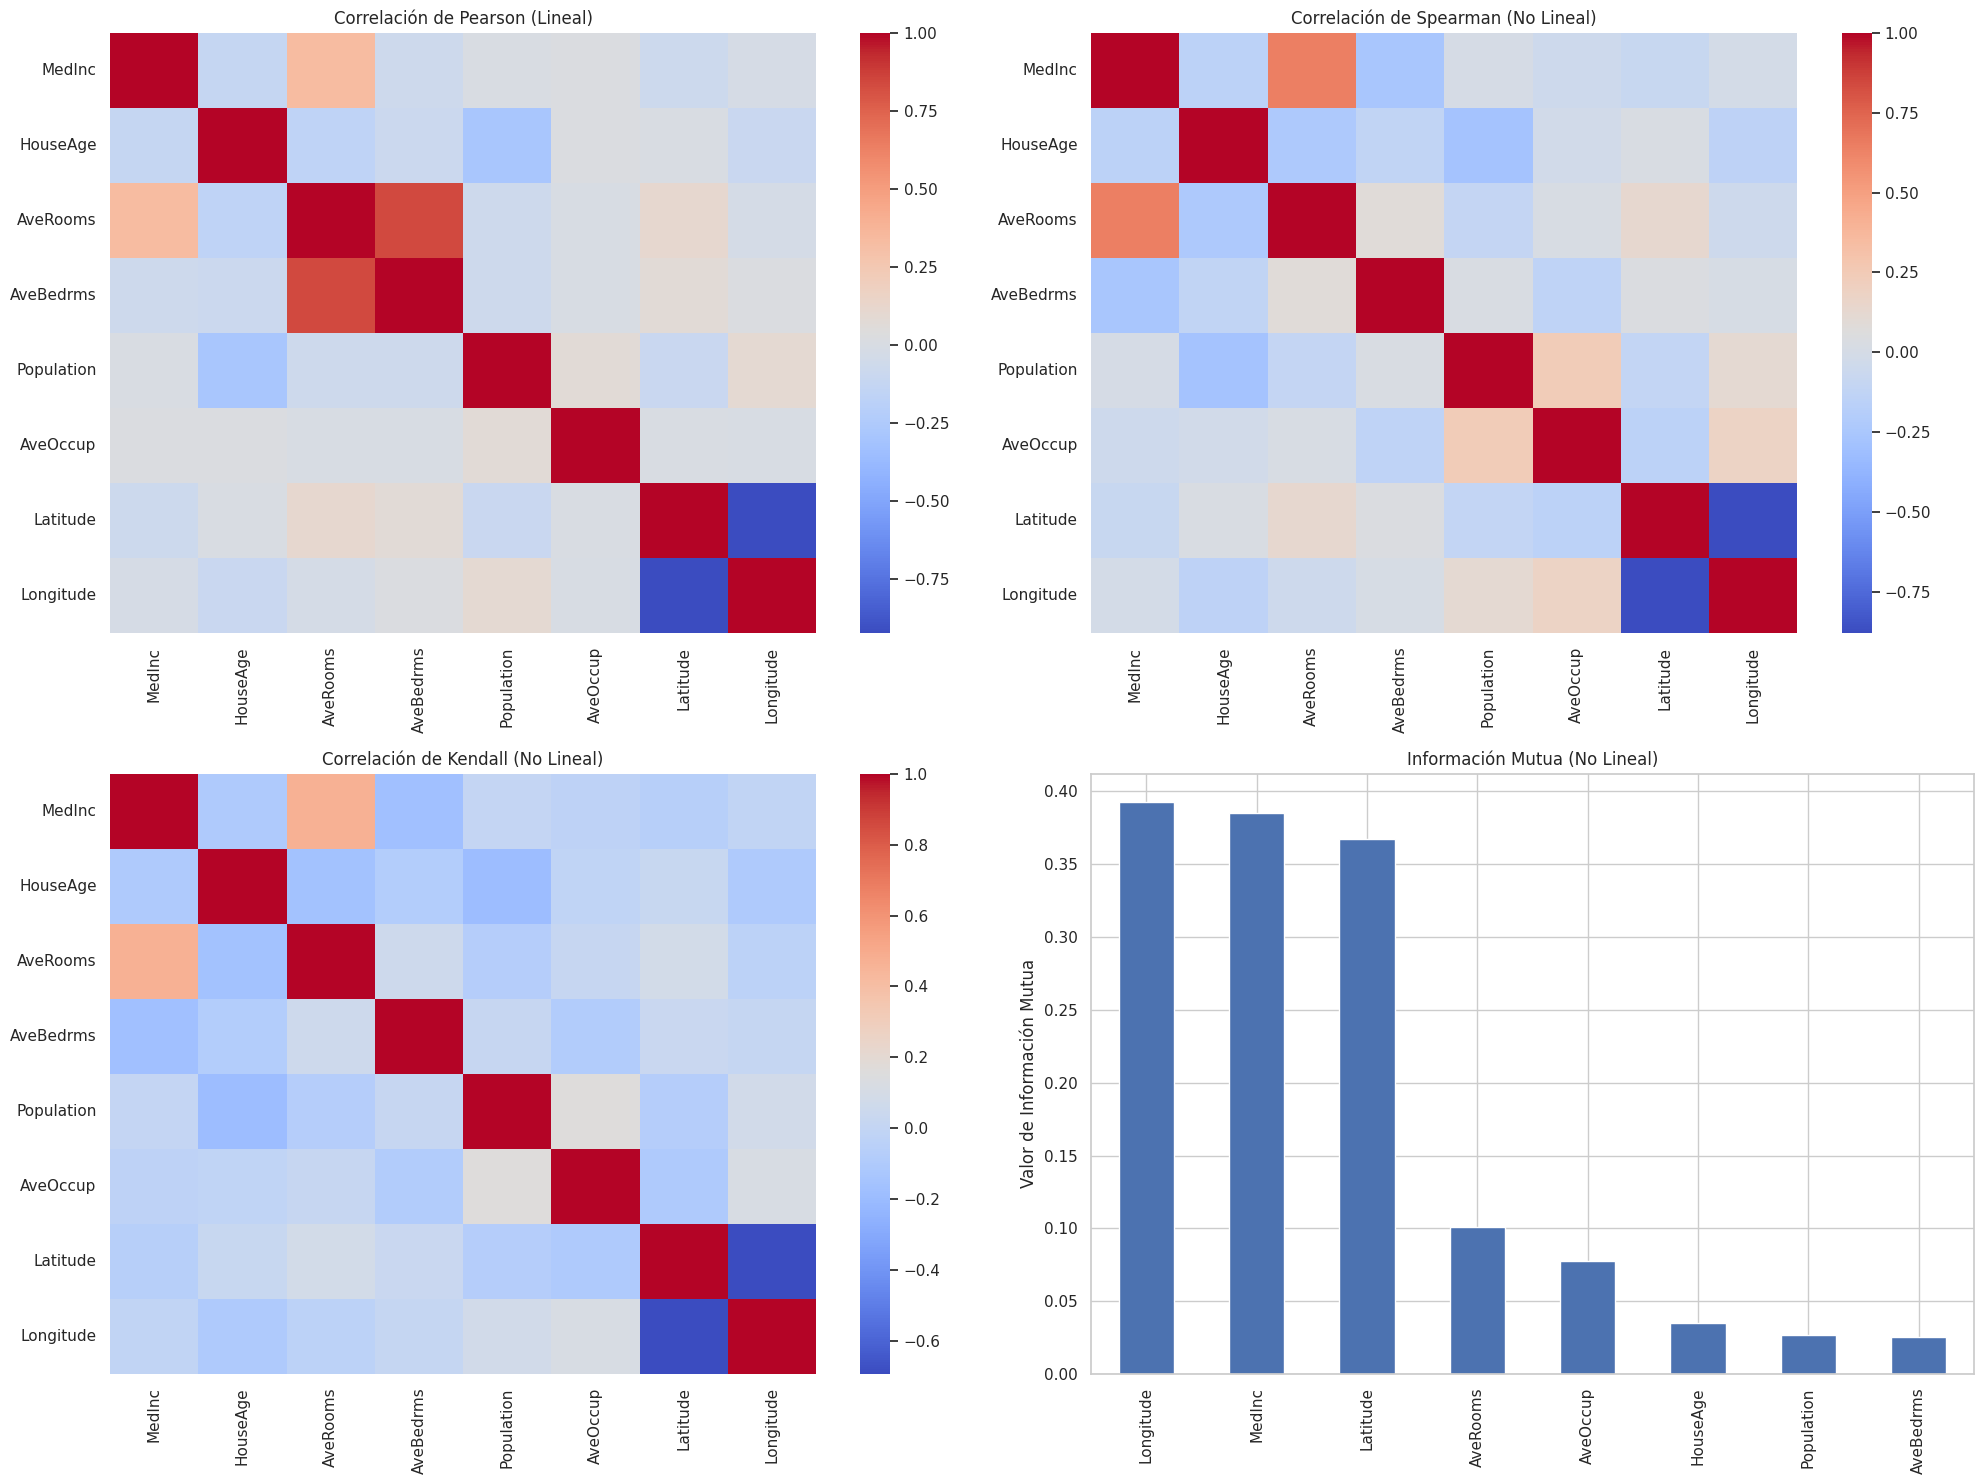

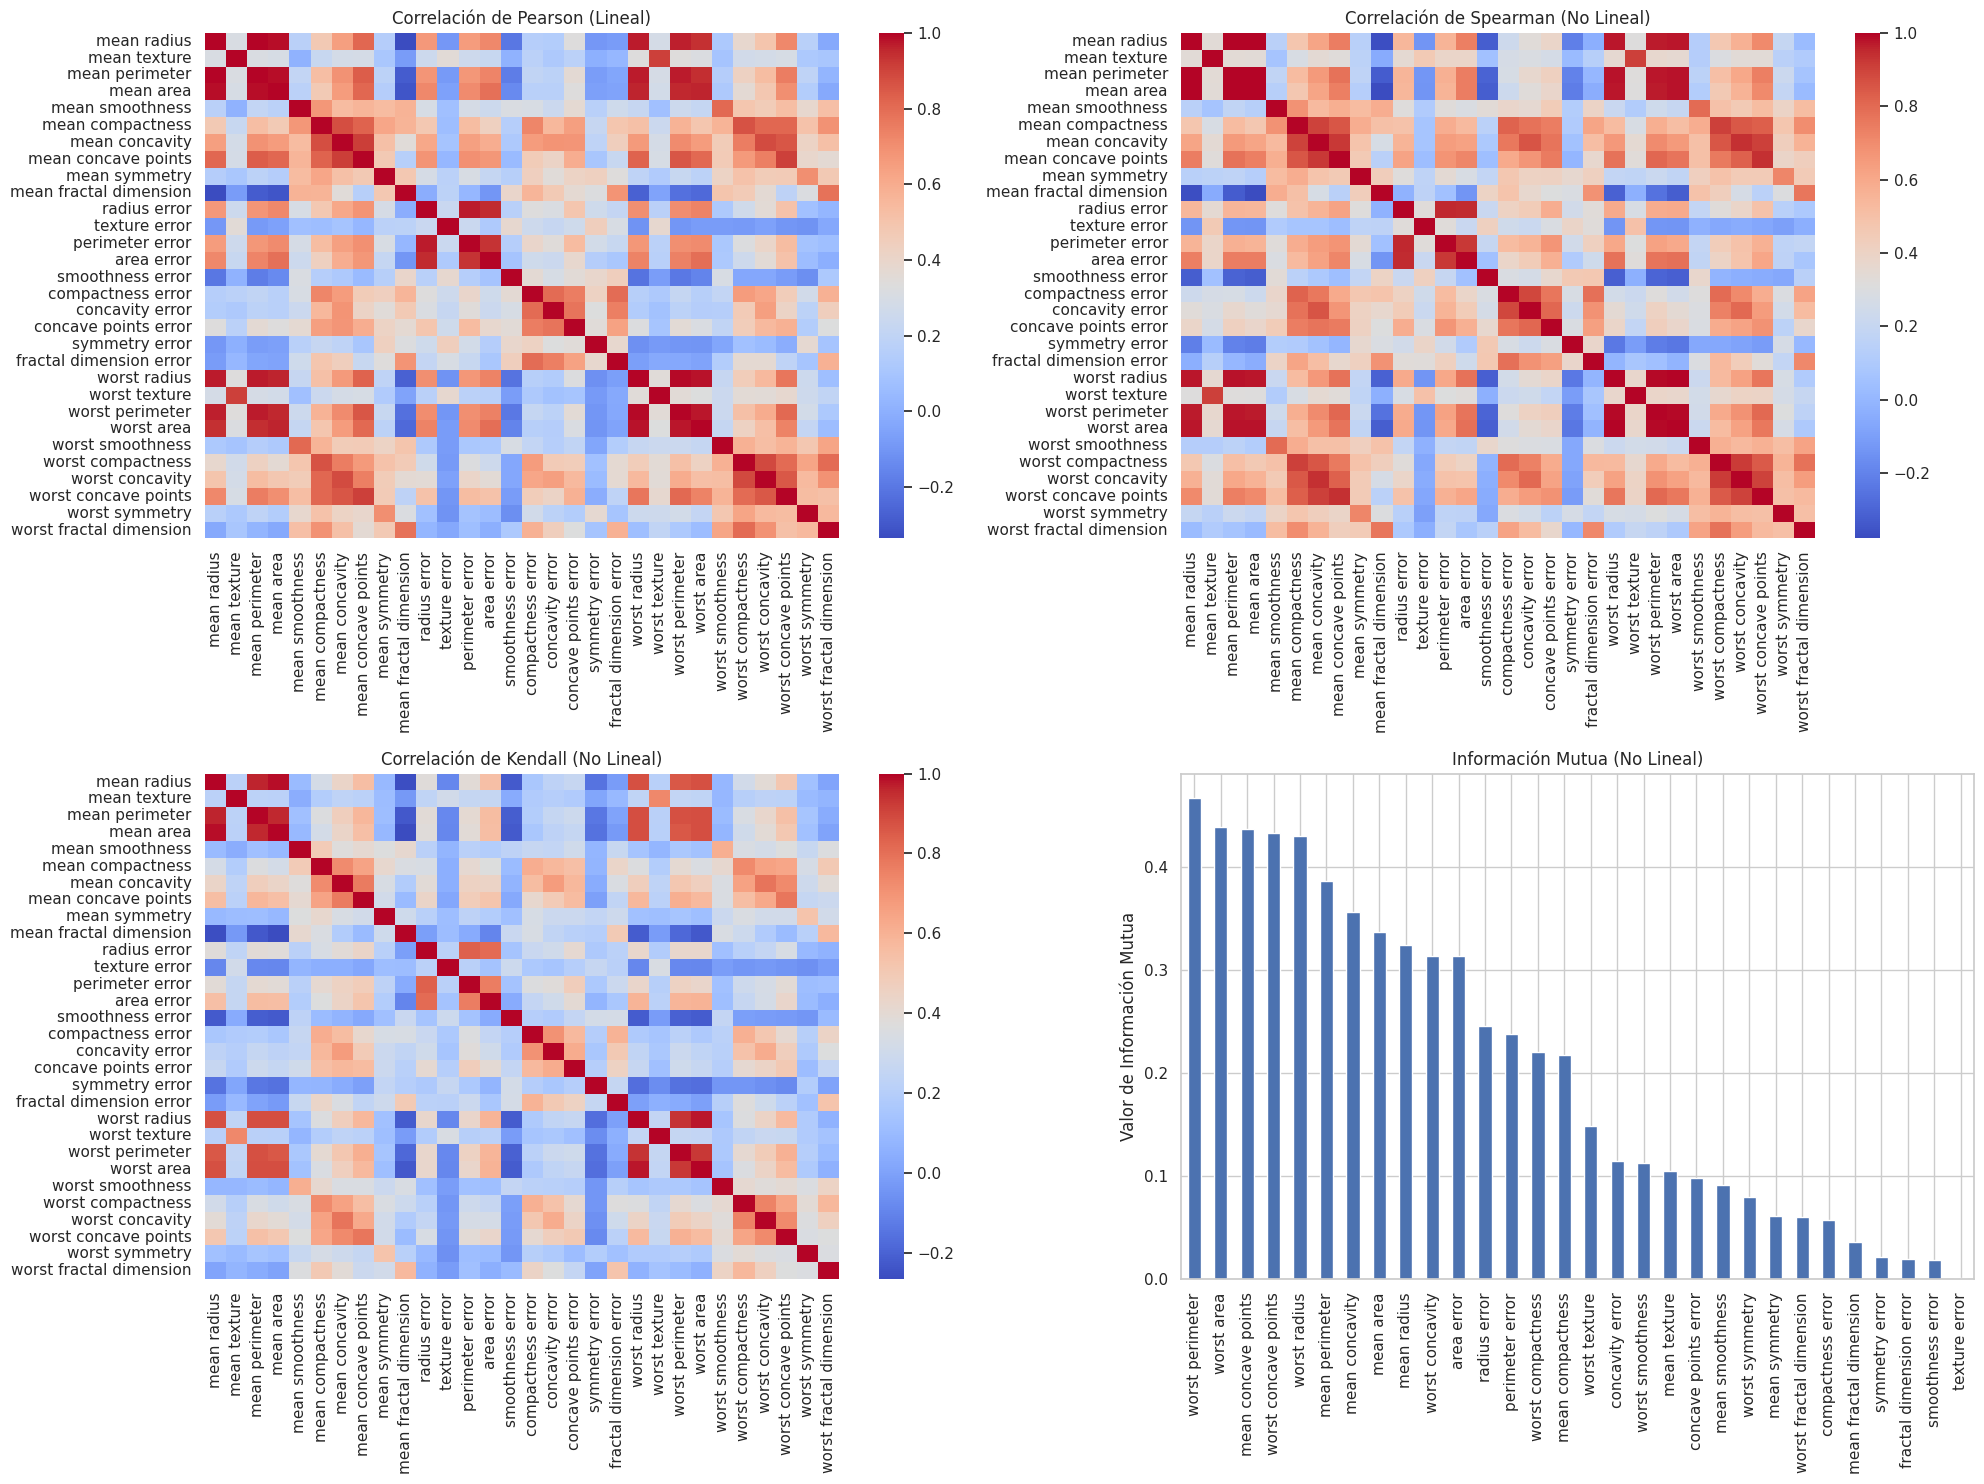

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import shap

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# 3. Análisis de correlación lineal y no lineal
def plot_correlation_analysis(X, y, task_type='regression'):
    """
    Función para visualizar diferentes métodos de correlación, incluyendo métodos lineales y no lineales.
    """
    plt.figure(figsize=(20, 15))

    # Correlación de Pearson (lineal)
    plt.subplot(2, 2, 1)
    corr_matrix = X.corr(method='pearson')
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación de Pearson (Lineal)')

    # Correlación de Spearman (monótona, no lineal)
    plt.subplot(2, 2, 2)
    spearman_corr = X.corr(method='spearman')
    sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación de Spearman (No Lineal)')

    # Correlación de Kendall (monótona, no lineal)
    plt.subplot(2, 2, 3)
    kendall_corr = X.corr(method='kendall')
    sns.heatmap(kendall_corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación de Kendall (No Lineal)')

    # Información mutua (no lineal)
    plt.subplot(2, 2, 4)
    if task_type == 'regression':
        mi = mutual_info_regression(X, y)
    else:
        mi = mutual_info_classif(X, y)
    mi_series = pd.Series(mi, index=X.columns)
    mi_series.sort_values(ascending=False).plot(kind='bar')
    plt.title('Información Mutua (No Lineal)')
    plt.ylabel('Valor de Información Mutua')

    plt.tight_layout()
    plt.show()

# Análisis de correlación para California Housing (Regresión)
plot_correlation_analysis(X_train_california, y_train_california, task_type='regression')

# Análisis de correlación para el Cáncer de Mama (Clasificación)
plot_correlation_analysis(X_train_cancer, y_train_cancer, task_type='classification')




| Herramienta / Enfoque                                     | ¿Qué es?                                                                      | ¿Para qué sirve?                                       | Nivel                 |
| --------------------------------------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------------ | --------------------- |
| **Feature importance** (RF/XGB, permutación, SHAP global) | Ranking de variables según su aporte **promedio** al modelo                   | Priorizar/entender qué variables pesan                 | **Global**            |
| **SelectKBest / SelectFromModel**                         | Métodos de **selección de variables** (tests univariados o basados en modelo) | **Quedarme** con las columnas más útiles               | **Global** (filtrado) |
| **treeinterpreter**                                       | Descomposición de una **predicción** en bias + contribuciones por feature     | Explicar **por qué** el modelo decidió **en ese caso** | **Local**             |


Por qué suelen diferir

SelectKBest es univariado: evalúa cada feature sola (ANOVA f_classif, f_regression, chi2, etc.). No ve interacciones ni redundancias.

Feature importance (p. ej., Random Forest/XGB):

Es multivariado y dependiente del modelo: considera interacciones y no linealidades.

La MDI (feature_importances_) puede sobrevalorar alta cardinalidad; mejor contrastar con permutation importance.Colinealidad: KBest puede marcar “buenas” a varias features redundantes; el modelo luego “elige” solo algunas.

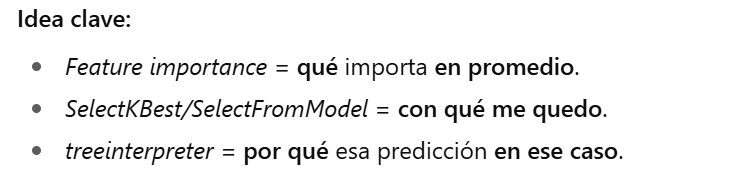